# 3D 数据绘制

#### 本节学习小目标

- 直接在 Jupyter Notebook 里交互式绘制 3D 数据，%matplotlib notebook


- 创建 xy 坐标网格，np.meshgrid


- 3D 线框模式，ax.plot_wireframe


- 3D 散点图，ax.scatter


- 3D 面片绘制模式，ax.plot_surface


- 3D 数据等高线模式，ax.contour3D


- 3D 网格数据三角面片绘制模式，ax.plot_trisurf


- 读取 3D 网格模型 obj 文件

In [1]:
# 导入 Matplotlib 三维绘图工具包
from mpl_toolkits import mplot3d

In [2]:
# %matplotlib auto
# %matplotlib inline
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = 8.2, 5.28

首先，让我们创建一个 3D 图轴。我们将 projection ='3d' 传递到 `fig0.add_subplot`，此处将返回 `Axes3DSubplot` 对象，即画布。

<IPython.core.display.Javascript object>


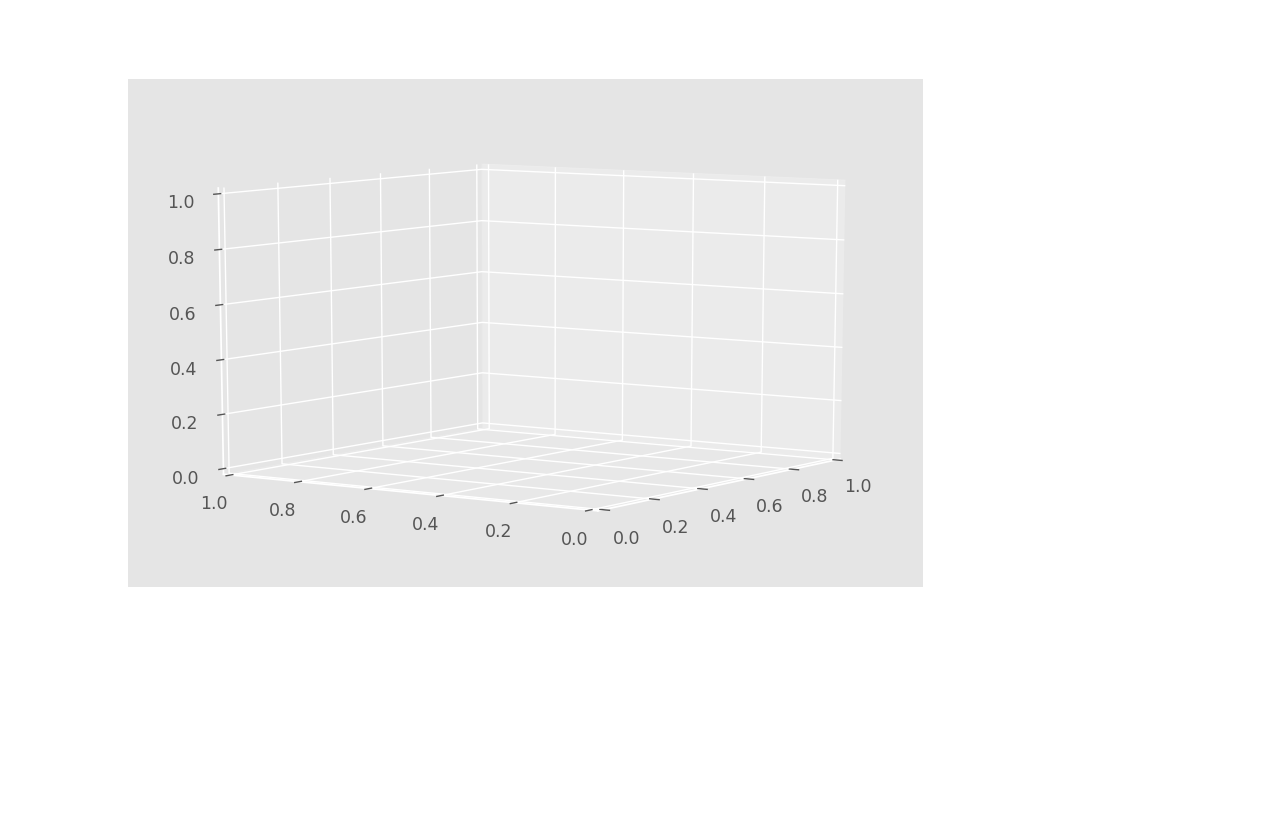

In [4]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111, projection='3d')

我们将使用高斯-拉普拉斯算子（LoG），这是一种滤波器，通常用于计算机视觉中的边缘检测。

对于给定的点 $x$ 和 $y$，其值通过以下公式得出，

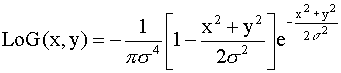

这个函数对应的代码为，

In [5]:
def LoG(x, y, sigma):
    t = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - t) * np.exp(-t)

现在，我们生成一些测试数据。以下所有 X2，Y2，Z2 都是尺寸为 32×32 的 2d 数组。

采用这些 2d 数组，我们还将它们重塑为 1d，例如 X1，Y1 和 Z1。这些一维数组将稍后用于绘制相关图形。

In [6]:
N = 32
half_N = N // 2

# 生成 2D xy-坐标网格
X2, Y2 = np.meshgrid(range(N), range(N))

# 计算各点的 z 坐标
Z2 = -LoG(X2 - half_N, Y2 - half_N, sigma=8)

# 转化为一维数组
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)

### 线框模式

<IPython.core.display.Javascript object>


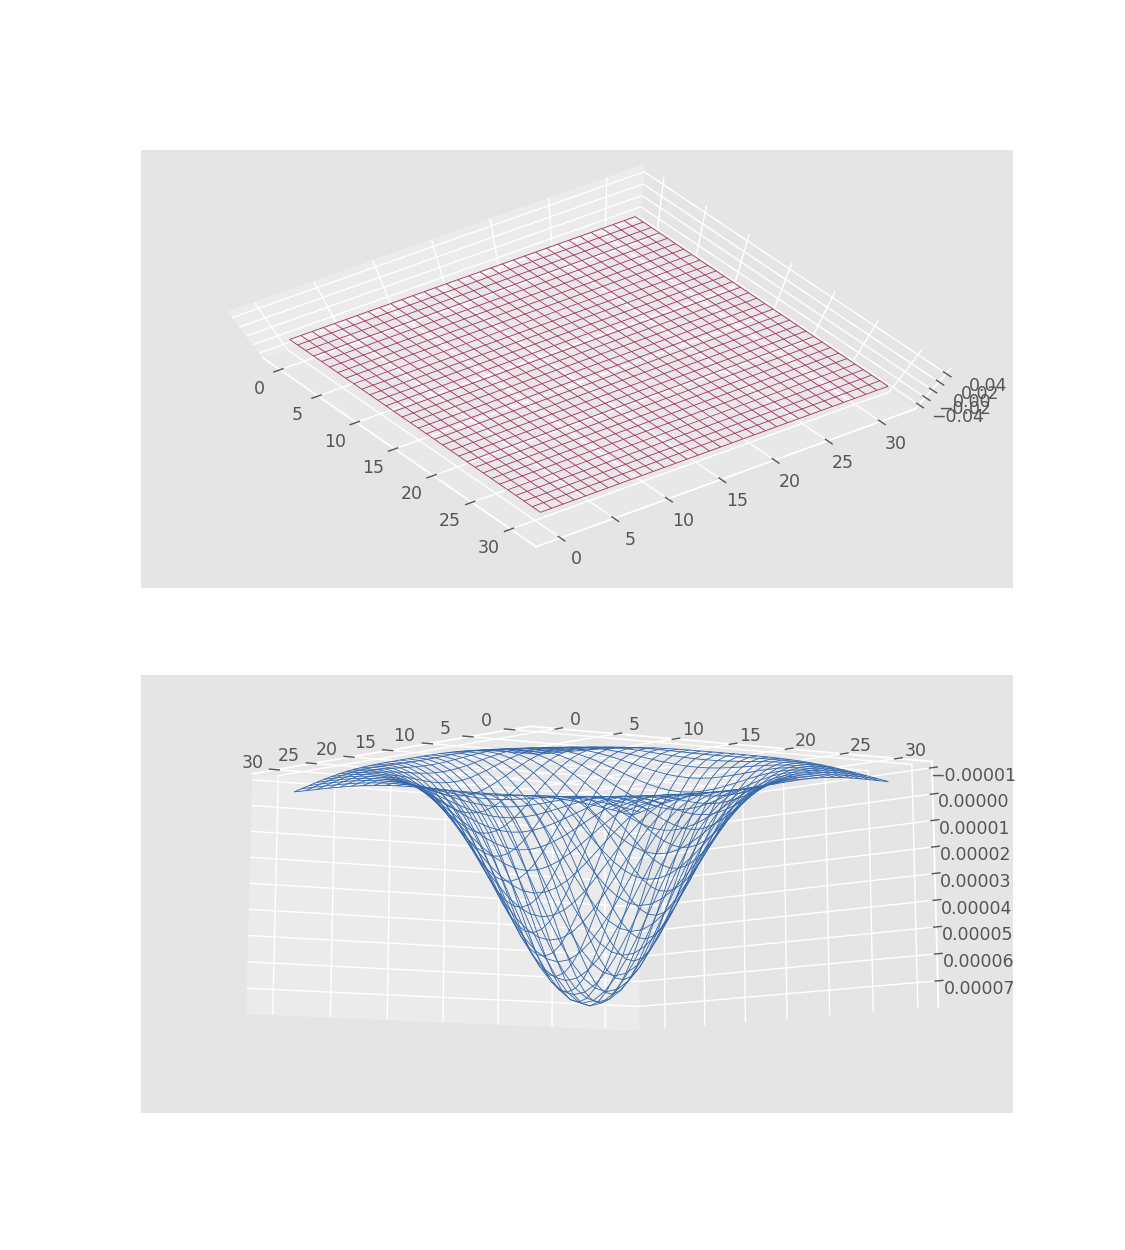

In [7]:
# 1、创建 figure
fig1 = plt.figure(figsize=(9, 10))

# 2、创建图轴 1 并绘制坐标网格
ax1 = fig1.add_subplot(211, projection='3d')

ax1.plot_wireframe(X2, Y2, 0*Z2, linewidth=0.5, color='#aa3366');

# 3、创建图轴 2 并绘制 LoG 曲面
ax2 = fig1.add_subplot(212, projection='3d')

ax2.plot_wireframe(X2, Y2, Z2, linewidth=0.5, color='#3366aa');

### 面片模式

In [8]:
ax1.clear()
ax1.plot_surface(X2, Y2, Z2, alpha=1.0, cmap='coolwarm');

# 此时回到上面看第一个图轴

### 散点模式

<IPython.core.display.Javascript object>


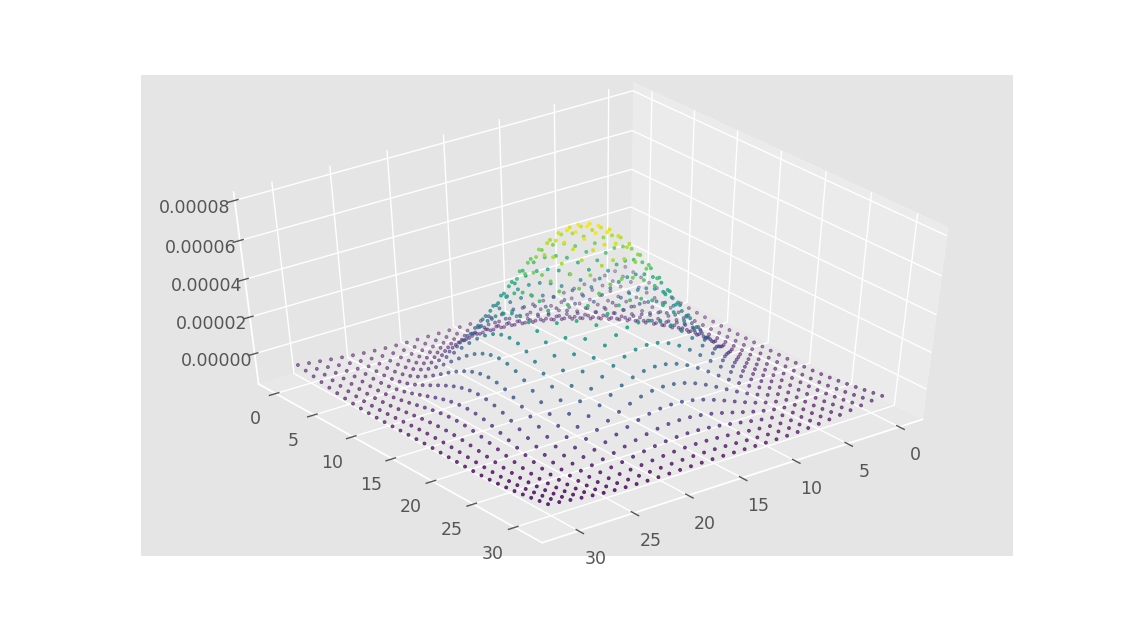

In [9]:
# 1、创建 figure
fig2 = plt.figure(figsize=(9, 5))

# 2、创建图轴并绘制坐标网格
ax21 = fig2.add_subplot(111, projection='3d')

# ax21.plot_wireframe(X2, Y2, Z2, linewidth=0.5, color='#333333');
ax21.scatter(X1, Y1, Z1, c=Z1, cmap='viridis', s=3);

### 等高线（水平）模式

- 下面的 22 是要绘制的轮廓线的数量。

<IPython.core.display.Javascript object>


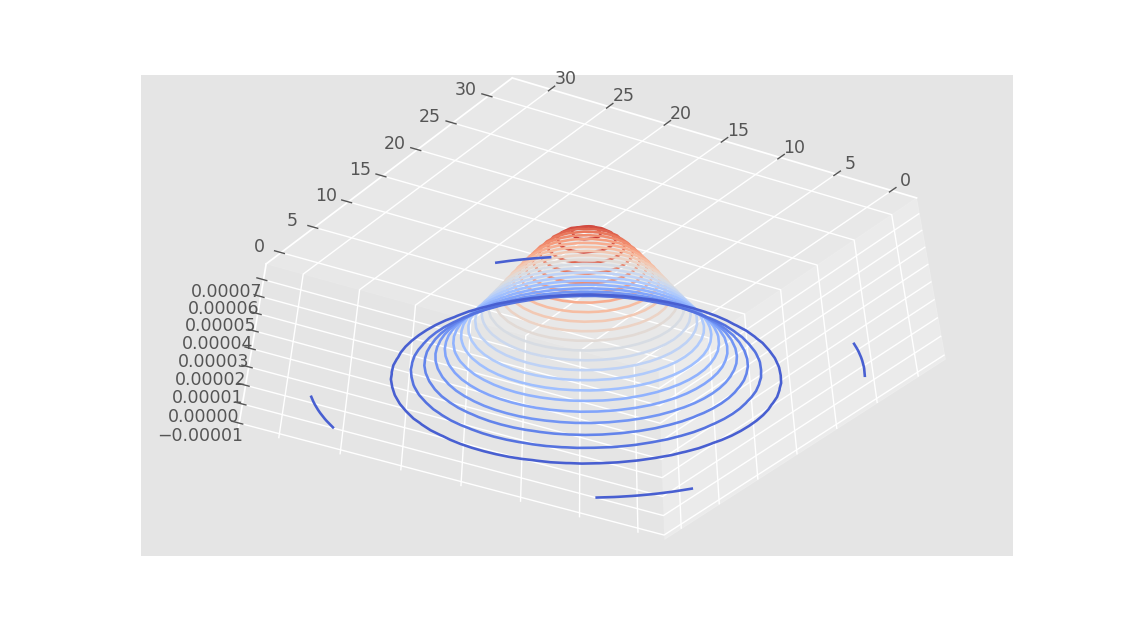

In [10]:
# 1、创建 figure
fig3 = plt.figure(figsize=(9, 5))

# 2、创建图轴并绘制坐标网格
ax3 = fig3.add_subplot(111, projection='3d')

ax3.contour3D(X2, Y2, Z2, 22, cmap='coolwarm');
ax3.view_init(16, 45) # 初始化视角

# 试着更改轮廓线数量

### 三角形网格绘制模式

- 通过 ``ax.plot_trisurf`` 方法绘制，会由点自动创建一个三角形网格，再绘制每个三角形。


- 这个例子这样做看上去没有上面的方式干净，但是它提供了一种更加灵活的方式绘制三维数据。因为有些 3D 数据不适合通过一个规则的 `grid` 网格来表示，此时就可以通过这种方法来处理。

<IPython.core.display.Javascript object>


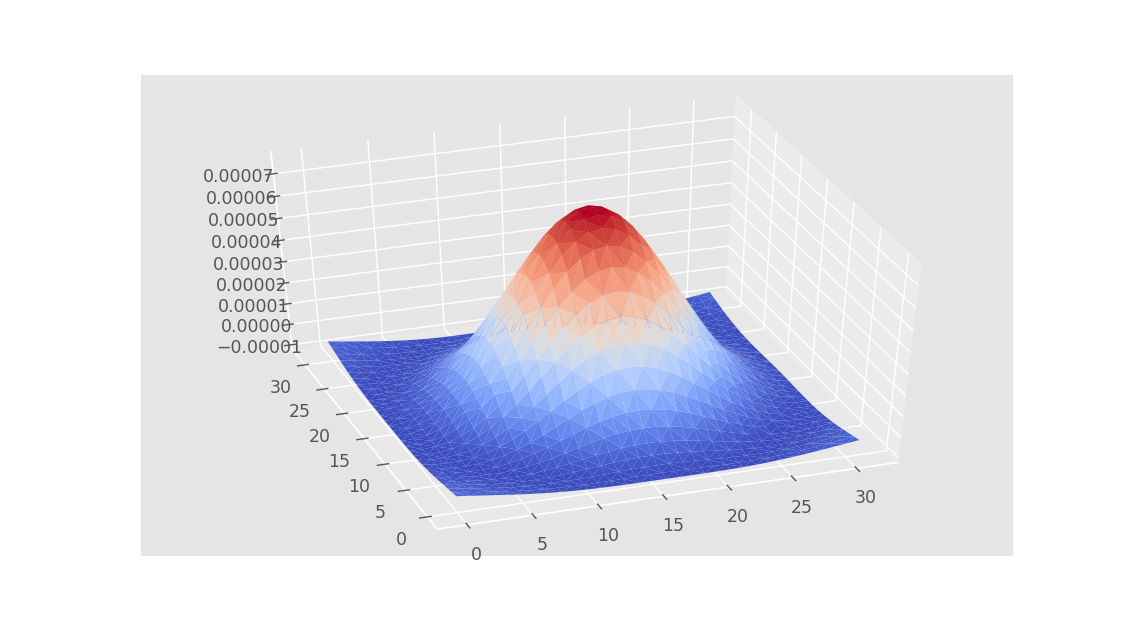

In [17]:
# 1、创建 figure
fig4 = plt.figure(figsize=(9, 5))

# 2、创建图轴并绘制坐标网格
ax4 = fig4.add_subplot(111, projection='3d')

ax4.plot_trisurf(X1, Y1, Z1, cmap='coolwarm');

## 读取和绘制 3D 网格模型

In [14]:
def objload(filename):
    tris = []
    vers = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # 面片
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    tris.append(indices[i: i+3])
            elif components[0] == "v": # 顶点坐标
                # e.g. "v  1.2 0.5 -1.8"
                vertex = list(map(lambda c: float(c), components[1:]))
                vers.append(vertex)
    return np.array(vers), np.array(tris)

In [16]:
# 读取三维模型，将顶点数据和面片数据存入两个数组
vertices, triangles = objload("boy.obj")

# 顶点坐标数组
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]

FileNotFoundError: [Errno 2] No such file or directory: 'boy.obj'

In [56]:
vertices.shape, triangles.shape

((5052, 3), (9999, 3))

<IPython.core.display.Javascript object>


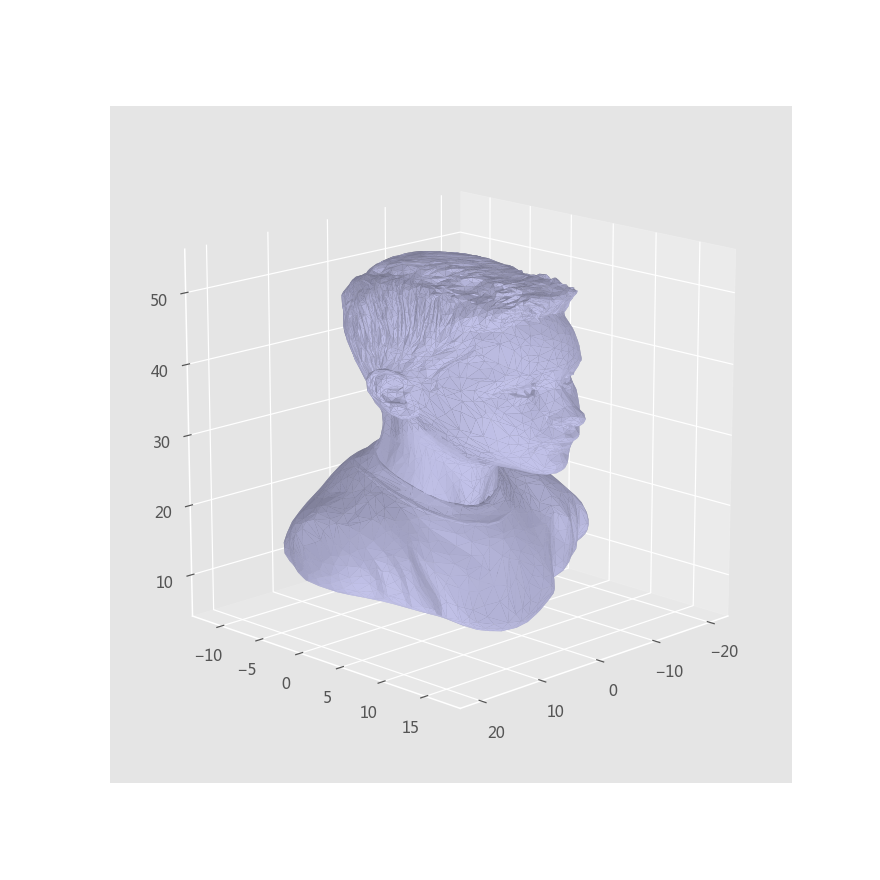

In [60]:
fig_mesh = plt.figure(figsize=(8, 8))

ax_mesh = fig_mesh.add_subplot(111, projection='3d')
ax_mesh.set_xlim([-3, 3])
ax_mesh.set_ylim([-3, 3])
ax_mesh.set_zlim([0, 3])

ax_mesh.clear()
ax_mesh.plot_trisurf(x, z, triangles, y, shade=True, color='#c2c2e9', edgecolor='none')

ax_mesh.view_init(16, 45) # 初始化视角

#### 绘制网格边

<IPython.core.display.Javascript object>


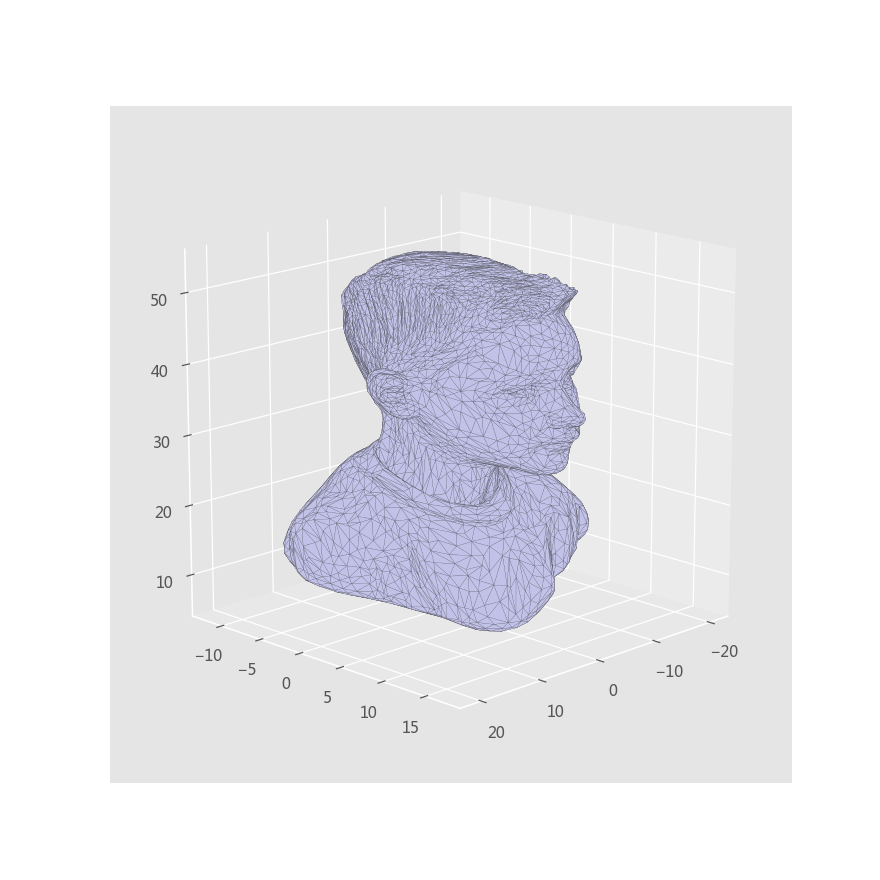

In [58]:
fig_mesh1 = plt.figure(figsize=(8, 8))

ax_mesh1 = fig_mesh1.add_subplot(111, projection='3d')

ax_mesh1.plot_trisurf(x, z, triangles, y, shade=False, color='#c2c2e9', linewidth=0.1, edgecolor='#393939')

ax_mesh1.view_init(16, 45) # 初始化视角

#### 明暗着色

<IPython.core.display.Javascript object>


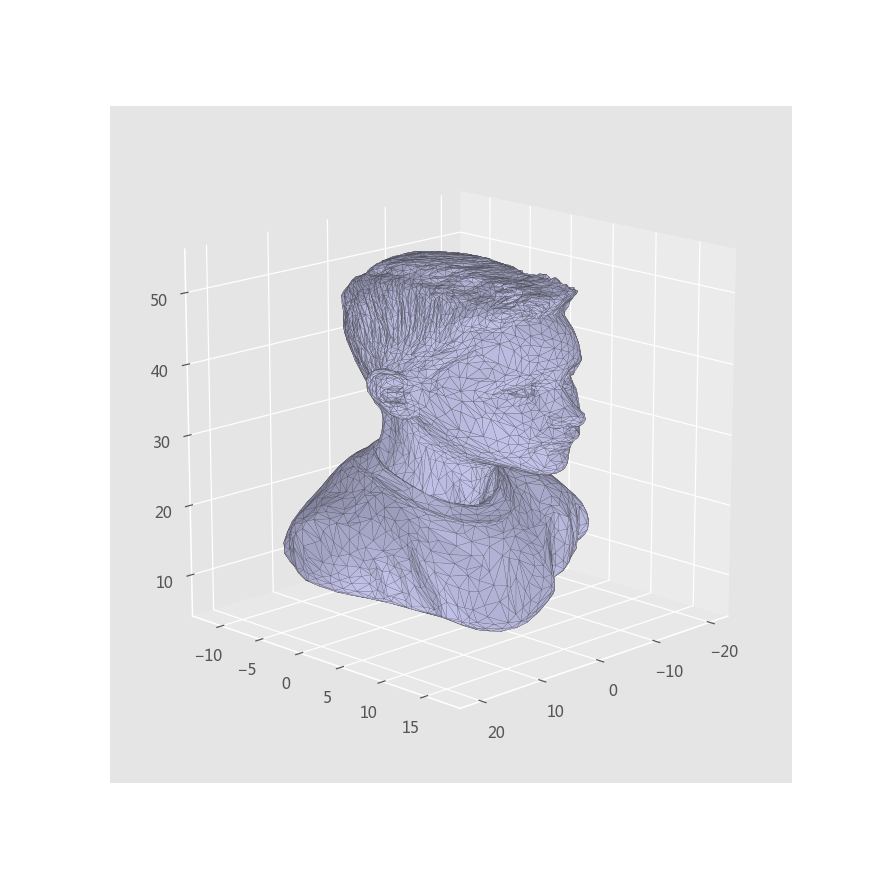

In [70]:
fig_mesh2 = plt.figure(figsize=(8, 8))

ax_mesh2 = fig_mesh2.add_subplot(111, projection='3d')
ax_mesh2.plot_trisurf(x, z, triangles, y, shade=True, color='#c2c2e9', linewidth=0.1, edgecolor='#393939')

ax_mesh2.view_init(16, 45) # 初始化视角

#### Matplotlib 三维绘制的更多内容请看

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## 练习，以各种模式绘制如下 3D 数据

In [62]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [63]:
X3 = np.reshape(X, -1)
Y3 = np.reshape(Y, -1)
Z3 = np.reshape(Z, -1)

<IPython.core.display.Javascript object>


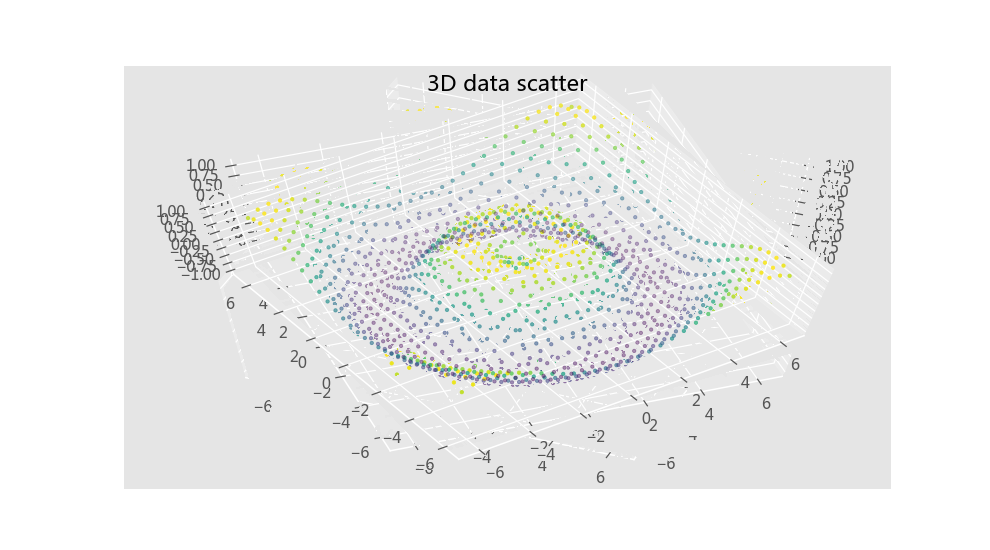

In [72]:
# 1、创建 figure
fig8 = plt.figure(figsize=(9, 5))
# 2、创建图轴并绘制坐标网格
ax8 = fig8.add_subplot(111, projection='3d')

# 比如散点图，再练习其他绘制模式
ax8.scatter(X3, Y3, Z3, c=Z3, s=5, cmap='viridis', linewidth=0.5);

ax8.set_title('3D data scatter')
ax8.view_init(90, -90) 